<a href="https://colab.research.google.com/github/lux1129/La-vuelta-de-don-Juan./blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [40]:
pd.options.display.float_format = '{:,.2f}'.format


In [28]:
ingresos_t1 = tienda["Precio"].sum()
ingresos_t2 = tienda2["Precio"].sum()
ingresos_t3 = tienda3["Precio"].sum()
ingresos_t4 = tienda4["Precio"].sum()

In [29]:
ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingresos totales": [ingresos_t1, ingresos_t2, ingresos_t3, ingresos_t4]
})

ingresos


,Tienda,Ingresos totales
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"


# 2. Ventas por categoría

In [4]:
categorias_t1 = tienda["Categoría del Producto"].value_counts()
categorias_t2 = tienda2["Categoría del Producto"].value_counts()
categorias_t3 = tienda3["Categoría del Producto"].value_counts()
categorias_t4 = tienda4["Categoría del Producto"].value_counts()




In [5]:
categorias_comparadas = pd.concat([categorias_t1, categorias_t2, categorias_t3, categorias_t4],
                                  axis=1
                                  )
categorias_comparadas.columns = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
categorias_comparadas

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


# 3. Calificación promedio de la tienda


In [6]:
prom_t1 = tienda["Calificación"].mean()
prom_t2 = tienda2["Calificación"].mean()
prom_t3 = tienda3["Calificación"].mean()
prom_t4 = tienda4["Calificación"].mean()


# 4. Productos más y menos vendidos

In [7]:
calificaciones = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Satisfacción del cliente": [prom_t1, prom_t2, prom_t3, prom_t4]
})
calificaciones

,Tienda,Satisfacción del cliente
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


4.a Productos más y menos vendidos por categoría.

In [13]:
ventas_t1 = tienda.groupby(["Producto", "Categoría del Producto"]).size().reset_index(name="Cantidad")
ventas_t2 = tienda2.groupby(["Producto", "Categoría del Producto"]).size().reset_index(name="Cantidad")
ventas_t3 = tienda3.groupby(["Producto", "Categoría del Producto"]).size().reset_index(name="Cantidad")
ventas_t4 = tienda4.groupby(["Producto", "Categoría del Producto"]).size().reset_index(name="Cantidad")


In [17]:
top5_t1 = ventas_t1.sort_values("Cantidad", ascending=False).head(5).copy()
top5_t1["Tipo"] = "Más vendido"

bottom5_t1 = ventas_t1.sort_values("Cantidad", ascending=True).head(5).copy()
bottom5_t1["Tipo"] = "Menos vendido"

top5_t2 = ventas_t2.sort_values("Cantidad", ascending=False).head(5).copy()
top5_t2["Tipo"] = "Más vendido"

bottom5_t2 = ventas_t2.sort_values("Cantidad", ascending=True).head(5).copy()
bottom5_t2["Tipo"] = "Menos vendido"

top5_t3 = ventas_t3.sort_values("Cantidad", ascending=False).head(5).copy()
top5_t3["Tipo"] = "Más vendido"

bottom5_t3 = ventas_t3.sort_values("Cantidad", ascending=True).head(5).copy()
bottom5_t3["Tipo"] = "Menos vendido"

top5_t4 = ventas_t4.sort_values("Cantidad", ascending=False).head(5).copy()
top5_t4["Tipo"] = "Más vendido"

bottom5_t4 = ventas_t4.sort_values("Cantidad", ascending=True).head(5).copy()
bottom5_t4["Tipo"] = "Menos vendido"

In [19]:
resumen_t1 = pd.concat([top5_t1, bottom5_t1]).reset_index(drop=True)
resumen_t2 = pd.concat([top5_t2, bottom5_t2]).reset_index(drop=True)
resumen_t3 = pd.concat([top5_t3, bottom5_t3]).reset_index(drop=True)
resumen_t4 = pd.concat([top5_t4, bottom5_t4]).reset_index(drop=True)


In [20]:
from IPython.display import display, HTML

html = f"""
<table style="width:100%">
  <tr>
    <th style='text-align:left'>Tienda 1</th>
    <th style='text-align:left'>Tienda 2</th>
  </tr>
  <tr>
    <td>{resumen_t1.to_html(index=False)}</td>
    <td>{resumen_t2.to_html(index=False)}</td>
  </tr>
  <tr>
    <th style='text-align:left'>Tienda 3</th>
    <th style='text-align:left'>Tienda 4</th>
  </tr>
  <tr>
    <td>{resumen_t3.to_html(index=False)}</td>
    <td>{resumen_t4.to_html(index=False)}</td>
  </tr>
</table>
"""

display(HTML(html))


# 5. Envío promedio por tienda

In [34]:
envio_prom_t1 = tienda["Costo de envío"].mean()
envio_prom_t2 = tienda2["Costo de envío"].mean()
envio_prom_t3 = tienda3["Costo de envío"].mean()
envio_prom_t4 = tienda4["Costo de envío"].mean()

In [38]:
resumen = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingresos totales": [ingresos_t1, ingresos_t2, ingresos_t3, ingresos_t4],
    "Costo de envío promedio": [envio_prom_t1, envio_prom_t2, envio_prom_t3, envio_prom_t4]
})
display(resumen)

,Tienda,Ingresos totales,Costo de envío promedio
0,Tienda 1,"1,150,880,400.00","26,018.61"
1,Tienda 2,"1,116,343,500.00","25,216.24"
2,Tienda 3,"1,098,019,600.00","24,805.68"
3,Tienda 4,"1,038,375,700.00","23,459.46"


6.GRÁFICOS

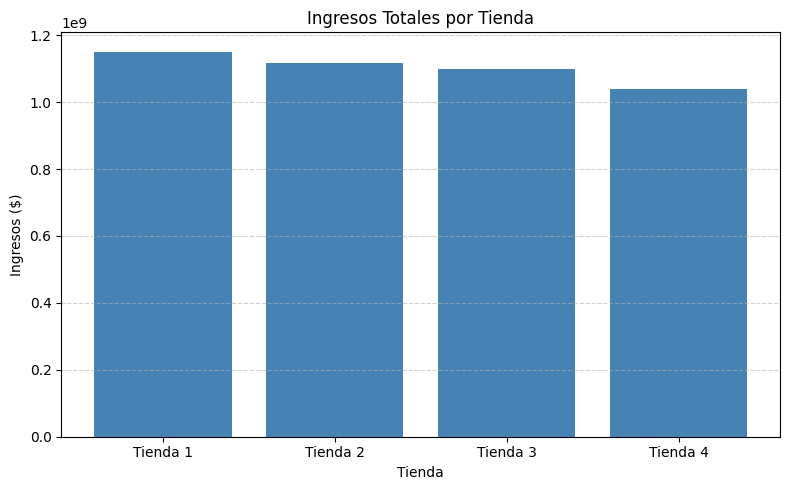

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(resumen["Tienda"], resumen["Ingresos totales"], color='steelblue')
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Ingresos ($)")
plt.xlabel("Tienda")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

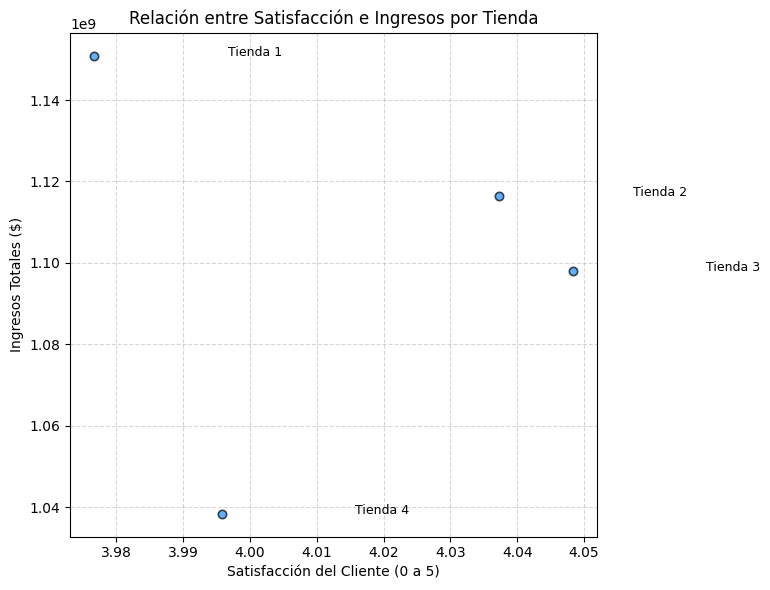

In [47]:
plt.figure(figsize=(8,6))

# Dispersión: Satisfacción vs Ingresos
plt.scatter(calificaciones["Satisfacción del cliente"], resumen["Ingresos totales"],
            color='dodgerblue', alpha=0.7, edgecolors='black', linewidths=1.2)

# Etiquetas de cada punto (nombre de tienda)
for i in range(len(resumen)):
    plt.text(calificaciones["Satisfacción del cliente"][i]+0.02,
             resumen["Ingresos totales"][i],
             resumen["Tienda"][i], fontsize=9)

plt.title("Relación entre Satisfacción e Ingresos por Tienda")
plt.xlabel("Satisfacción del Cliente (0 a 5)")
plt.ylabel("Ingresos Totales ($)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

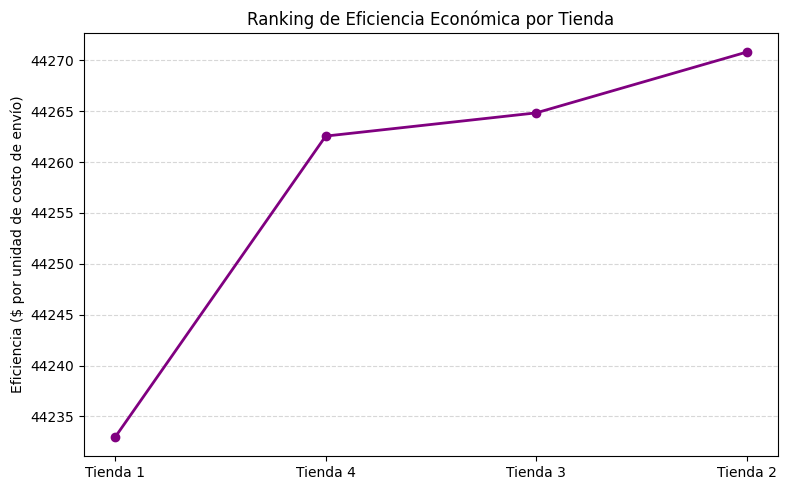

In [49]:

resumen["Eficiencia"] = resumen["Ingresos totales"] / resumen["Costo de envío promedio"]


eficiencia_ordenada = resumen.sort_values("Eficiencia")


plt.figure(figsize=(8, 5))
plt.plot(eficiencia_ordenada["Tienda"], eficiencia_ordenada["Eficiencia"], marker="o", color="purple", linewidth=2)
plt.title("Ranking de Eficiencia Económica por Tienda")
plt.ylabel("Eficiencia ($ por unidad de costo de envío)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


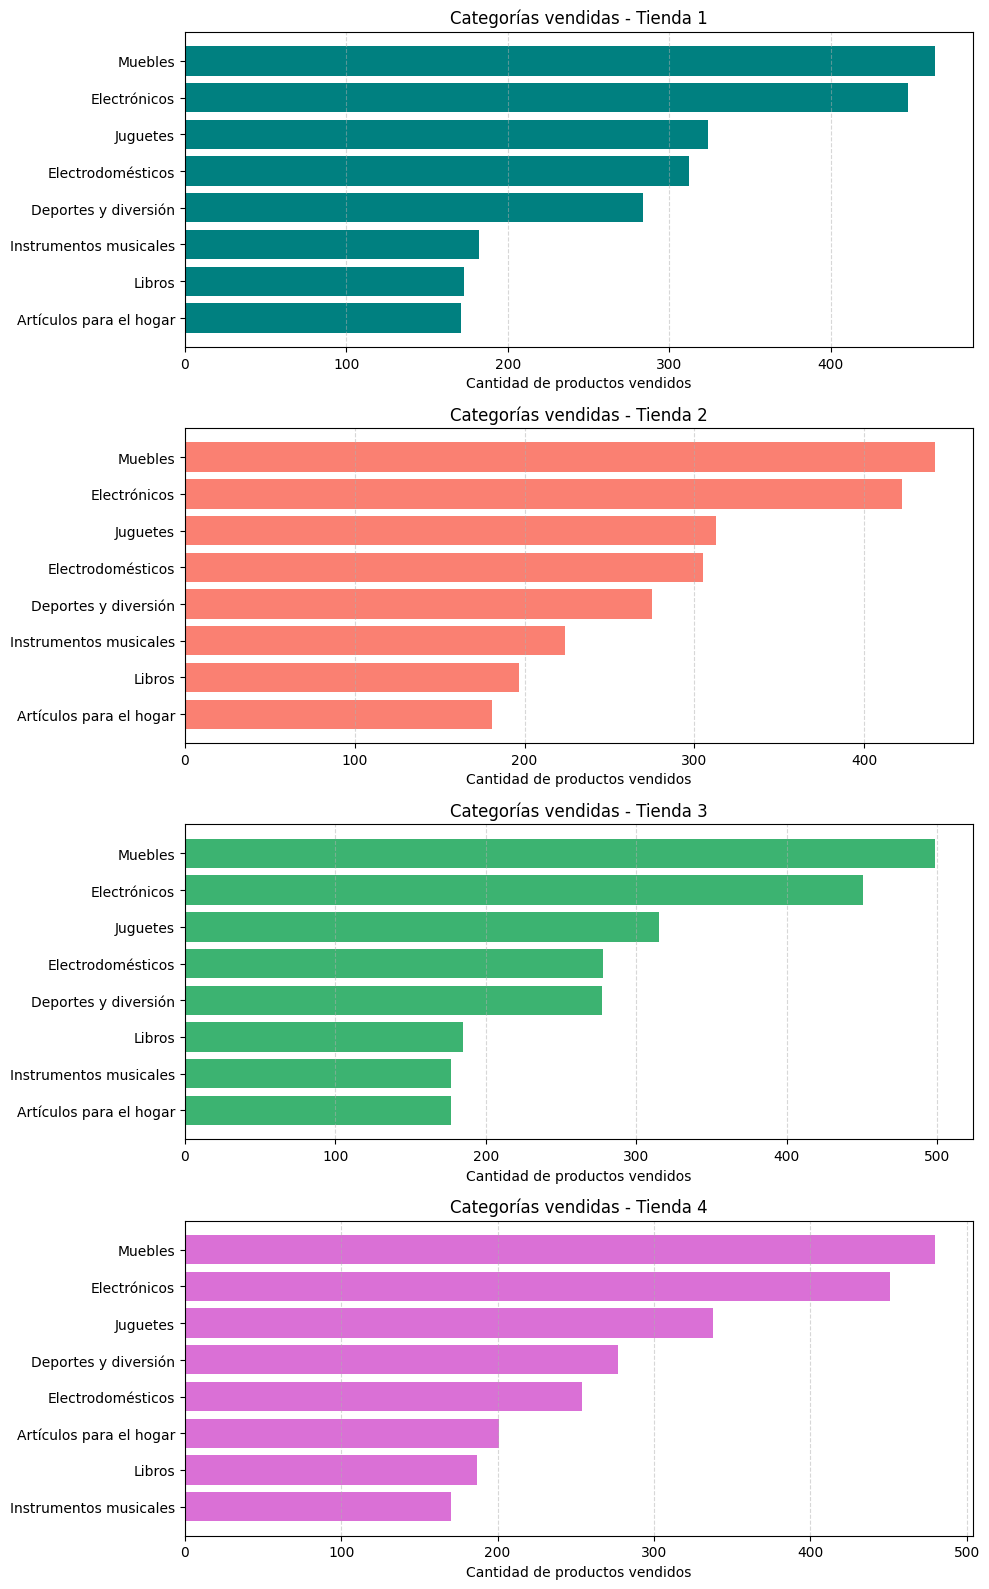

In [52]:


# Paso 1: Contar ventas por categoría en cada tienda
cat_t1 = tienda["Categoría del Producto"].value_counts()
cat_t2 = tienda2["Categoría del Producto"].value_counts()
cat_t3 = tienda3["Categoría del Producto"].value_counts()
cat_t4 = tienda4["Categoría del Producto"].value_counts()

# Paso 2: Crear figura con 4 subgráficos (uno por tienda)
fig, axs = plt.subplots(4, 1, figsize=(10, 16), sharex=False)

# Gráfico Tienda 1
axs[0].barh(cat_t1.index, cat_t1.values, color='teal')
axs[0].set_title("Categorías vendidas - Tienda 1")
axs[0].invert_yaxis()

# Gráfico Tienda 2
axs[1].barh(cat_t2.index, cat_t2.values, color='salmon')
axs[1].set_title("Categorías vendidas - Tienda 2")
axs[1].invert_yaxis()

# Gráfico Tienda 3
axs[2].barh(cat_t3.index, cat_t3.values, color='mediumseagreen')
axs[2].set_title("Categorías vendidas - Tienda 3")
axs[2].invert_yaxis()

# Gráfico Tienda 4
axs[3].barh(cat_t4.index, cat_t4.values, color='orchid')
axs[3].set_title("Categorías vendidas - Tienda 4")
axs[3].invert_yaxis()

# Ajustes globales
for ax in axs:
    ax.set_xlabel("Cantidad de productos vendidos")
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

